In [11]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [13]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import VGG16


In [5]:
TRAINING_PATH = 'asl_alphabet_train/'
TEST_PATH = 'asl_alphabet_test/'

In [16]:
IMAGE_SIZE = 200
BATCH_SIZE = 64

In [17]:
datagen_augmented = ImageDataGenerator(
    samplewise_center=True, 
    samplewise_std_normalization=True,
    brightness_range=[0.8, 1.0],
    zoom_range=[1.0, 1.2],
    validation_split=0.1
)

traingen_augmented = datagen_augmented.flow_from_directory(TRAINING_PATH, target_size=(IMAGE_SIZE, IMAGE_SIZE), shuffle=True, seed=13,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")

validgen_augmented = datagen_augmented.flow_from_directory(TRAINING_PATH, target_size=(IMAGE_SIZE, IMAGE_SIZE), shuffle=True, seed=13,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [6]:
VGG16_model = VGG16(
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3), 
    include_top = False, 
    weights = 'imagenet'
)
for layer in VGG16_model.layers:
    layer.trainable = False
    
x = VGG16_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(29, activation='softmax')(x)

In [7]:
VGG16_model = Model(VGG16_model.input, predictions) 
VGG16_model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
checkpoint = ModelCheckpoint('asl_vgg16_best_weights.h5', save_best_only=True, monitor='val_accuracy', mode='max')

In [8]:
VGG_history= VGG16_model.fit(
    traingen_augmented,
    validation_data=validgen_augmented,
    steps_per_epoch=100,
    validation_steps = 50,
    epochs = 10
)

Epoch 1/10
100/100 [==============================] - 911s 9s/step - loss: 2.8874 - accuracy: 0.1889 - val_loss: 1.7181 - val_accuracy: 0.5219
Epoch 2/10
100/100 [==============================] - 950s 10s/step - loss: 1.6548 - accuracy: 0.4623 - val_loss: 0.8455 - val_accuracy: 0.7534
Epoch 3/10
100/100 [==============================] - 951s 10s/step - loss: 1.1997 - accuracy: 0.5906 - val_loss: 0.5752 - val_accuracy: 0.7934
Epoch 4/10
100/100 [==============================] - 930s 9s/step - loss: 0.9430 - accuracy: 0.6730 - val_loss: 0.4580 - val_accuracy: 0.8619
Epoch 5/10
100/100 [==============================] - 913s 9s/step - loss: 0.8377 - accuracy: 0.7055 - val_loss: 0.4638 - val_accuracy: 0.8519
Epoch 6/10
100/100 [==============================] - 908s 9s/step - loss: 0.7386 - accuracy: 0.7398 - val_loss: 0.4567 - val_accuracy: 0.8525
Epoch 7/10
100/100 [==============================] - 875s 9s/step - loss: 0.6693 - accuracy: 0.7698 - val_loss: 0.3356 - val_accuracy: 0.89

In [11]:
VGG_history = VGG16_model.fit(
    traingen_augmented,
    validation_data=validgen_augmented,
    steps_per_epoch=100,
    validation_steps=50,
    epochs=20,  # We want to continue to epoch 20, so this is set to 20
    initial_epoch=10  # Training has already completed 10 epochs, so this starts at 10
)


Epoch 11/20
100/100 [==============================] - 863s 9s/step - loss: 0.5442 - accuracy: 0.8125 - val_loss: 0.3191 - val_accuracy: 0.8941
Epoch 12/20
100/100 [==============================] - 889s 9s/step - loss: 0.4914 - accuracy: 0.8319 - val_loss: 0.2595 - val_accuracy: 0.9119
Epoch 13/20
100/100 [==============================] - 897s 9s/step - loss: 0.4962 - accuracy: 0.8295 - val_loss: 0.2870 - val_accuracy: 0.9128
Epoch 14/20
100/100 [==============================] - 878s 9s/step - loss: 0.4722 - accuracy: 0.8342 - val_loss: 0.2668 - val_accuracy: 0.9178
Epoch 15/20
100/100 [==============================] - 895s 9s/step - loss: 0.4852 - accuracy: 0.8336 - val_loss: 0.2676 - val_accuracy: 0.9134
Epoch 16/20
100/100 [==============================] - 877s 9s/step - loss: 0.4348 - accuracy: 0.8539 - val_loss: 0.2744 - val_accuracy: 0.9103
Epoch 17/20
100/100 [==============================] - 919s 9s/step - loss: 0.4191 - accuracy: 0.8542 - val_loss: 0.2635 - val_accuracy:

In [14]:

loss = [2.8874, 1.6548, 1.1997, 0.9430, 0.8377, 0.7386, 0.6693, 0.6470, 0.6182, 0.5851]
accuracy = [0.1889, 0.4623, 0.5906, 0.6730, 0.7055, 0.7398, 0.7698, 0.7806, 0.7912, 0.7953]
val_loss = [1.7181, 0.8455, 0.5752, 0.4580, 0.4638, 0.4567, 0.3356, 0.3671, 0.3377, 0.3607]
val_accuracy = [0.5219, 0.7534, 0.7934, 0.8619, 0.8519, 0.8525, 0.8919, 0.8731, 0.8984, 0.8778]


In [27]:
VGG16_model.save('vgg_2_asl_alphabet_9575.h5')

In [7]:
train_acc = [0.1889, 0.4623, 0.5906, 0.6730, 0.7055, 0.7398, 0.7698, 0.7806, 0.7912, 0.7953, 0.8125, 0.8319, 0.8295, 0.8342, 0.8336, 0.8539, 0.8542, 0.8597, 0.8528, 0.8533]
val_acc =  [0.5219, 0.7534, 0.7934, 0.8619, 0.8519, 0.8525, 0.8919, 0.8731, 0.8984, 0.8778,0.8941, 0.9119, 0.9128, 0.9178, 0.9134, 0.9103, 0.9250, 0.9072, 0.9141, 0.8963]
train_loss = [2.8874, 1.6548, 1.1997, 0.9430, 0.8377, 0.7386, 0.6693, 0.6470, 0.6182, 0.5851,0.5442, 0.4914, 0.4962, 0.4722, 0.4852, 0.4348, 0.4191, 0.4249, 0.4267, 0.4214]
val_loss = [1.7181, 0.8455, 0.5752, 0.4580, 0.4638, 0.4567, 0.3356, 0.3671, 0.3377, 0.3607, 0.3191, 0.2595, 0.2870, 0.2668, 0.2676, 0.2744, 0.2635, 0.2714, 0.2549, 0.2988]

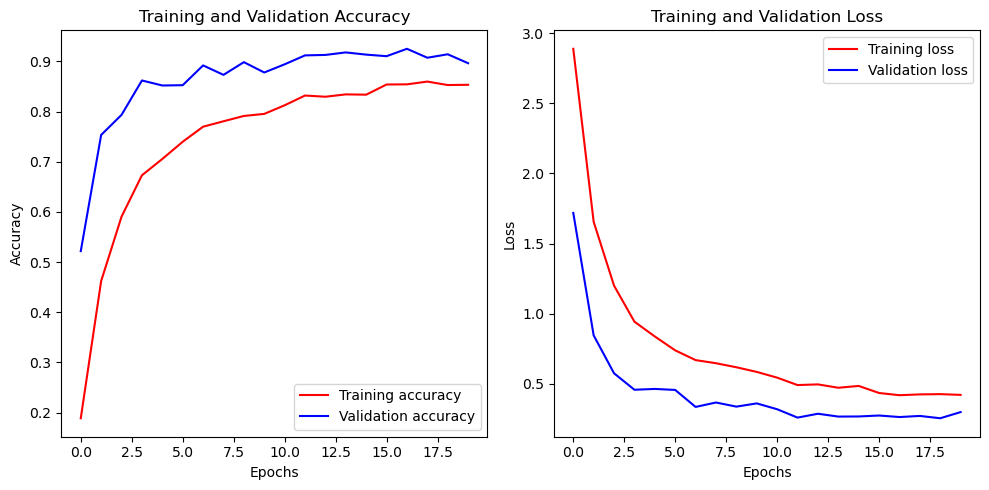

In [8]:
epochs = range(len(train_acc))

# Create a figure with two subplots
plt.figure(figsize=(10, 5))  # Adjust the size as needed

# Subplot 1: Training and validation accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')  # You can also use loc=0 for best location

# Subplot 2: Training and validation loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

# Show the plots
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

In [9]:
from keras.models import load_model
model = load_model('vgg_2_asl_alphabet_9575.h5')

In [18]:
classes = os.listdir(TRAINING_PATH)
classes.sort()
test_images = os.listdir(TEST_PATH)
total_test_cases = len(test_images)
total_correctly_classified = 0
total_misclassified = 0
for i, test_image in enumerate(test_images):
    image_location = TEST_PATH + test_image
    img = cv2.imread(image_location)
    img = cv2.resize(img, (200, 200))
    img = np.array(img) / 255.
    img = img.reshape((1, 200, 200, 3))
    img = datagen_augmented.standardize(img)
    prediction = np.array(model.predict(img))
    actual = test_image.split('_')[0]
    predicted = classes[prediction.argmax()]
    print('Actual class: {} - Predicted class: {}'.format(
        actual, predicted), end=' ')
    if actual == predicted:
      print('PASS!')
      total_correctly_classified += 1
    else:
      print('FAIL!')
      total_misclassified += 1
print("=" * 20)
test_accuracy = (total_correctly_classified / total_test_cases) * 100
test_error_rate = (total_misclassified / total_test_cases) * 100

print('Test accuracy (%):', test_accuracy)
print('Test error rate (%):', test_error_rate)
print('Number of misclassified classes:', total_misclassified)
print('Number of correctly classified classes', total_correctly_classified)

1/1 [==============================] - 0s 282ms/step
Actual class: F - Predicted class: F PASS!
1/1 [==============================] - 0s 111ms/step
Actual class: G - Predicted class: G PASS!
1/1 [==============================] - 0s 113ms/step
Actual class: L - Predicted class: L PASS!
1/1 [==============================] - 0s 115ms/step
Actual class: M - Predicted class: M PASS!
1/1 [==============================] - 0s 120ms/step
Actual class: R - Predicted class: R PASS!
1/1 [==============================] - 0s 120ms/step
Actual class: S - Predicted class: S PASS!
1/1 [==============================] - 0s 137ms/step
Actual class: X - Predicted class: X PASS!
1/1 [==============================] - 0s 111ms/step
Actual class: Y - Predicted class: Y PASS!
1/1 [==============================] - 0s 110ms/step
Actual class: U - Predicted class: U PASS!
1/1 [==============================] - 0s 113ms/step
Actual class: T - Predicted class: T PASS!
1/1 [==============================] - 0